<a href="https://colab.research.google.com/github/alrb2005/MechaineLearing-0716-/blob/master/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
from tensorflow.keras.datasets.mnist import load_data
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test)= load_data()

In [70]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


ans: 5


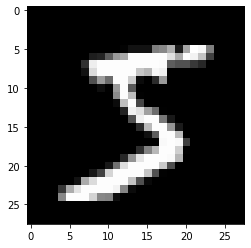

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
idx = 0
print("ans:", y_train[idx])
plt.imshow(x_train[idx], cmap="gray")

In [72]:
import pandas as pd
pd.DataFrame(x_train[idx])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers = [
    # 784 * 128 + 128(bias)
    Dense(1024, activation="relu", input_dim=784),
    # 128 * 10 + 10(bias)
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


In [74]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=CategoricalCrossentropy(),
       optimizer=Adam(),
       metrics=["accuracy"])

In [75]:

from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [76]:
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255

In [77]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
save_callback = ModelCheckpoint("mnist.h5", save_best_only=True)
stop_callback = EarlyStopping(patience=5, restore_best_weights=True)
# batch_size: 看幾筆再做一次梯度(平均)下降[20-200]
# validation_split: 切出一部分資料來驗證模型好壞
# epoch: 整份資料要看幾輪
# verbose: 2 不要進度條
model.fit(x_train_norm, 
     y_train_cat,
     batch_size=200,
     validation_split=0.1,
     epochs=50,
     verbose=2,
     callbacks=[stop_callback, save_callback])

Epoch 1/50
270/270 - 5s - loss: 0.2807 - accuracy: 0.9210 - val_loss: 0.1249 - val_accuracy: 0.9660
Epoch 2/50
270/270 - 5s - loss: 0.1117 - accuracy: 0.9676 - val_loss: 0.0899 - val_accuracy: 0.9738
Epoch 3/50
270/270 - 5s - loss: 0.0726 - accuracy: 0.9786 - val_loss: 0.0774 - val_accuracy: 0.9782
Epoch 4/50
270/270 - 5s - loss: 0.0495 - accuracy: 0.9853 - val_loss: 0.0680 - val_accuracy: 0.9808
Epoch 5/50
270/270 - 5s - loss: 0.0348 - accuracy: 0.9904 - val_loss: 0.0646 - val_accuracy: 0.9807
Epoch 6/50
270/270 - 5s - loss: 0.0246 - accuracy: 0.9933 - val_loss: 0.0679 - val_accuracy: 0.9798
Epoch 7/50
270/270 - 5s - loss: 0.0188 - accuracy: 0.9951 - val_loss: 0.0663 - val_accuracy: 0.9808
Epoch 8/50
270/270 - 5s - loss: 0.0135 - accuracy: 0.9967 - val_loss: 0.0641 - val_accuracy: 0.9818
Epoch 9/50
270/270 - 5s - loss: 0.0094 - accuracy: 0.9982 - val_loss: 0.0674 - val_accuracy: 0.9823
Epoch 10/50
270/270 - 5s - loss: 0.0070 - accuracy: 0.9989 - val_loss: 0.0623 - val_accuracy: 0.9830

In [78]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 1s 4ms/step - loss: 0.0586 - accuracy: 0.9832


[0.05856096372008324, 0.9832000136375427]

In [79]:
# model.save("mlp.h5")
# HDFView
from tensorflow.keras.models import load_model
loaded = load_model("mnist.h5")
# 不需要:compile 可以: fit/evaluate/predict
loaded.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.0586 - accuracy: 0.9832


[0.05856096372008324, 0.9832000136375427]

In [80]:
# sklearn: predict(預測類別) predict_proba(預測機率)
# tensorflow: predict_classes(預測類別) predict(預測機率)
pre = model.predict_classes(x_test_norm)
pre

array([7, 2, 1, ..., 4, 5, 6])

In [81]:
import pandas as pd
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pre),
       index=["{}(真實)".format(i) for i in range(10)],
       columns=["{}(預測)".format(i) for i in range(10)])

,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(真實),972,1,1,0,0,0,3,1,2,0
1(真實),0,1126,2,2,0,1,2,1,1,0
2(真實),4,1,1012,1,1,0,2,5,5,1
3(真實),0,0,2,989,0,6,0,4,3,6
4(真實),1,0,2,1,961,0,4,1,1,11
5(真實),2,0,0,5,1,877,3,0,2,2
6(真實),3,2,0,1,2,4,946,0,0,0
7(真實),1,2,9,1,1,0,0,1004,3,7
8(真實),3,0,2,2,2,4,1,3,952,5
9(真實),3,2,0,1,5,4,0,1,0,993


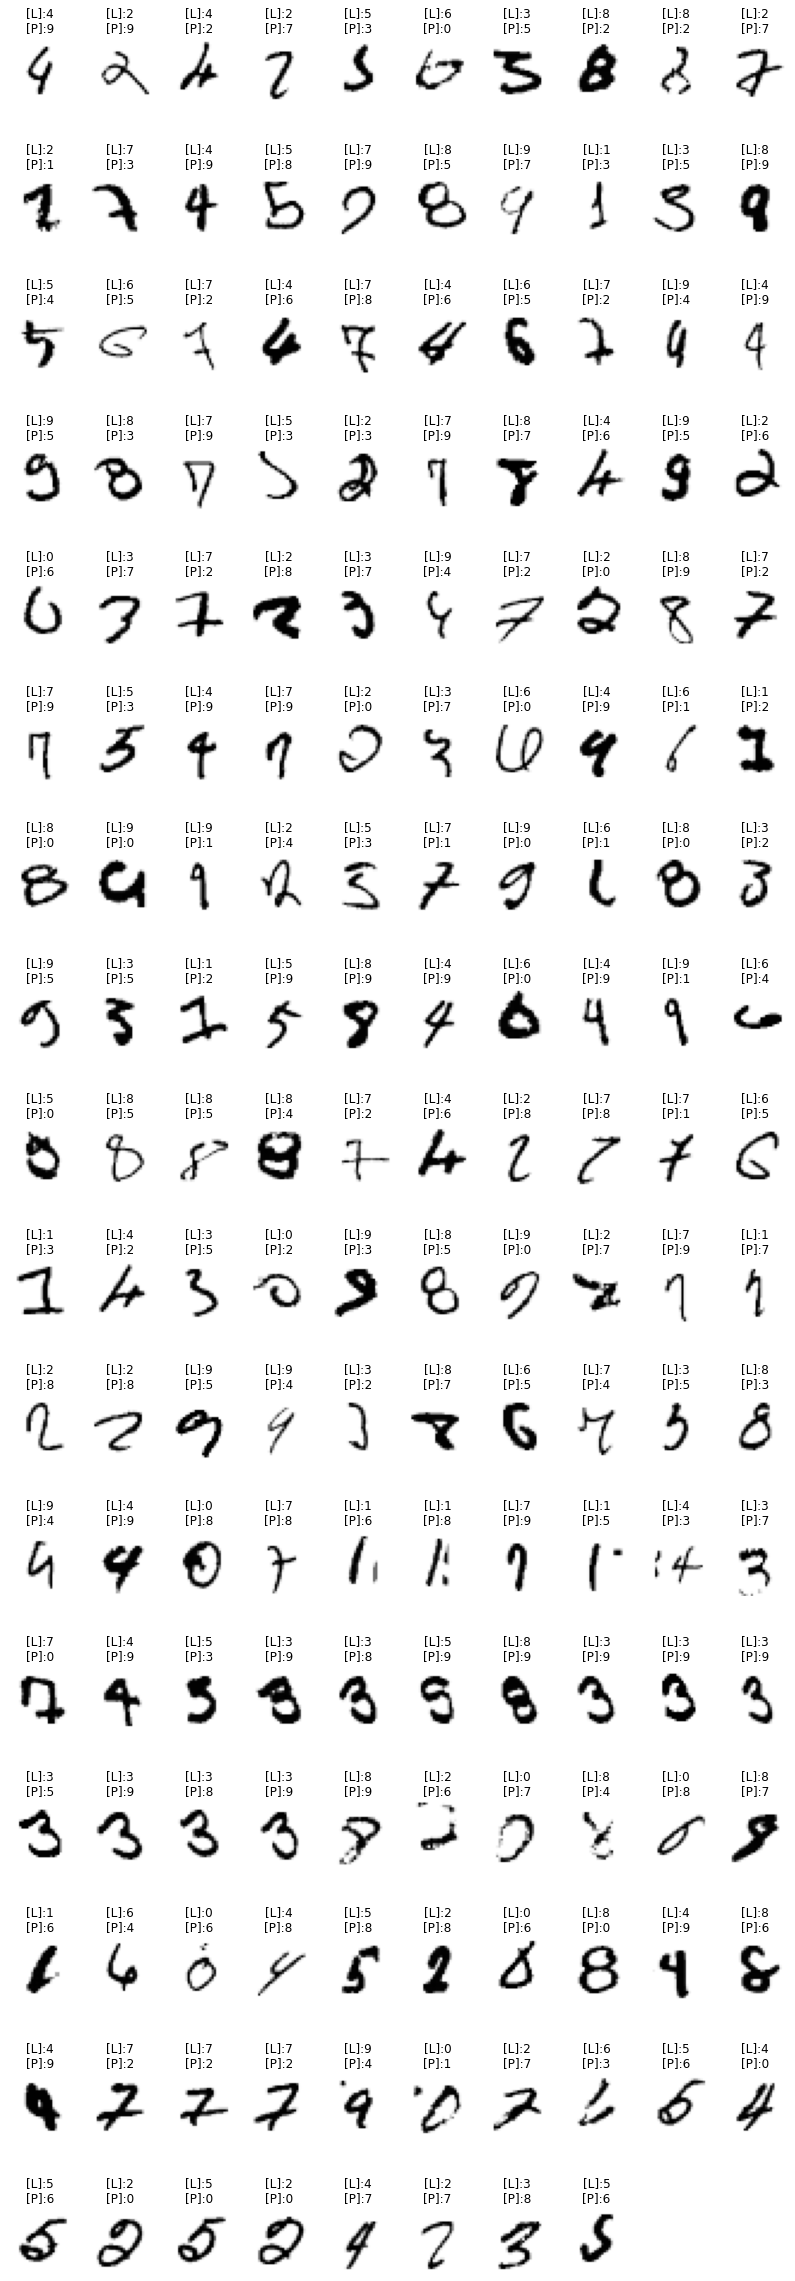

In [85]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#np.nonzero(pre != y_test)[0] # 這是一個tuple型式的，第一個array是X，另一個array是Y，這邊只有一維，所以取[0]
plt.figure(figsize=(14, 42))
idx = np.nonzero(pre != y_test)[0]
width = 10
height = len(idx) // width + 1
for i, d  in enumerate(idx):
    img, label, p = x_test[d], y_test[d], pre[d]
    t = "[L]:{}\n[P]:{}".format(label, p)
    plt.subplot(height, width, i+1)
    plt.title(t)
    plt.axis("off")
    plt.imshow(img, cmap="Greys")

檔名:test.png
0 的機率: 0.0
1 的機率: 0.0
2 的機率: 0.0
3 的機率: 0.0
4 的機率: 0.0
5 的機率: 0.0
6 的機率: 0.0
7 的機率: 1.0
8 的機率: 0.0
9 的機率: 0.0


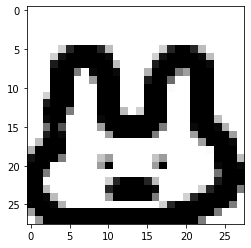

In [86]:
from tensorflow.keras.preprocessing.image import load_img
fn = input("檔名:")
img = load_img(fn, target_size=(28, 28)).convert("L")
img_np = np.array(img).reshape(1, 784) / 255
pre = model.predict(img_np)[0]
for i in range(10):
    print(i, "的機率:", round(pre[i], 2))
plt.imshow(np.array(img), cmap="Greys")